In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [2]:
rho = 13e3
Omega = 2*np.pi/86400
U0 = 8.7e-5

In [3]:
def f(alpha, lat, NoverOmega):
    expr = (NoverOmega**2 - 1)*(1 - 4*np.sin(lat)**2) + 4*np.cos(lat)**2*np.sin(alpha)**2
    
    if expr < 0:
        return 0.0

    sqrt_term = np.sqrt(expr)
    return sqrt_term * (np.sin(lat)**2 * np.cos(alpha)**2 + np.sin(alpha)**2)

In [4]:
def Pflux(hrms,k0,H,NoverOmega,lat):
 return (rho/8/np.pi**3)*(hrms**2*k0/(2*H-1))*(U0**2*Omega)*quad(f, 0, 2*np.pi, args=(lat, NoverOmega), limit=1000, epsabs=1e-10, epsrel=1e-10)[0]

In [5]:
def f_trad(alpha, lat, NoverOmega):
    expr = (NoverOmega**2 - 1)*(1 - 4*np.sin(lat)**2)
    
    if expr < 0:
        return 0.0

    sqrt_term = np.sqrt(expr)
    return sqrt_term * (np.sin(lat)**2 * np.cos(alpha)**2 + np.sin(alpha)**2)

In [6]:
def Pflux_trad(hrms,k0,H,NoverOmega,lat):
 return (rho/8/np.pi**3)*(hrms**2*k0/(2*H-1))*(U0**2*Omega)*quad(f_trad, 0, 2*np.pi, args=(lat, NoverOmega), limit=1000, epsabs=1e-10, epsrel=1e-10)[0]

In [20]:
# Vectorize over latitude
latitudes = np.linspace(0, np.pi/2, 200) 
Pflux_vec = np.vectorize(lambda lat: Pflux(3e3, 2*np.pi/1e6, 0.7, 0.5, lat))
power_flux = Pflux_vec(latitudes)

latitudes = np.linspace(0, np.pi/2, 200) 
Pflux_trad_vec = np.vectorize(lambda lat: Pflux_trad(3e3, 2*np.pi/1e6, 0.7, 0.5, lat))
power_flux_trad = Pflux_trad_vec(latitudes)

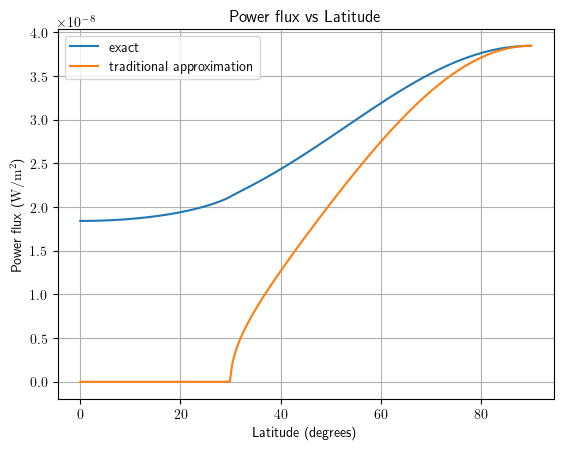

In [21]:
# Plotting
plt.rc('text', usetex=True)
plt.plot(np.degrees(latitudes), power_flux, label="exact")
plt.plot(np.degrees(latitudes), power_flux_trad, label="traditional approximation")
plt.xlabel("Latitude (degrees)")
plt.ylabel(r'Power flux ($\mathrm{W/m^2}$)')
plt.title("Power flux vs Latitude")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Wrapper for latitude integration, including Jacobian (R^2 cos(lat))
def integrand(lat, hrms, k0, H, NoverOmega, R):
    return Pflux(hrms, k0, H, NoverOmega, lat) * R**2 * np.cos(lat)

In [10]:
N_values = np.linspace(0., 5.0, 41) 
results = []

for NoverOmega in N_values:
    total_flux, _ = quad(
        integrand,
        -np.pi/2,
        np.pi/2,
        args=(5e3, 2*np.pi/0.5e6, 0.6, NoverOmega, 3486e3),
        limit=1000,
        epsabs=1e-10,
        epsrel=1e-10
    )
    results.append(total_flux)

/var/folders/c2/pmpqq3_j3hzffy78hpmlt6_80000gn/T/ipykernel_90143/4064917676.py:2: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return (rho/8/np.pi**3)*(hrms**2*k0/(2*H-1))*(U0**2*Omega)*quad(f, 0, 2*np.pi, args=(lat, NoverOmega), limit=1000, epsabs=1e-10, epsrel=1e-10)[0]


In [11]:
# Wrapper for latitude integration, including Jacobian (R^2 cos(lat))
def integrand_trad(lat, hrms, k0, H, NoverOmega, R):
    return Pflux_trad(hrms, k0, H, NoverOmega, lat) * R**2 * np.cos(lat)

In [12]:
N_values = np.linspace(0., 5.0, 41) 
results_trad = []

for NoverOmega in N_values:
    total_flux_trad, _ = quad(
        integrand_trad,
        -np.pi/2,
        np.pi/2,
        args=(5e3, 2*np.pi/0.5e6, 0.6, NoverOmega, 3486e3),
        limit=1000,
        epsabs=1e-10,
        epsrel=1e-10
    )
    results_trad.append(total_flux_trad)

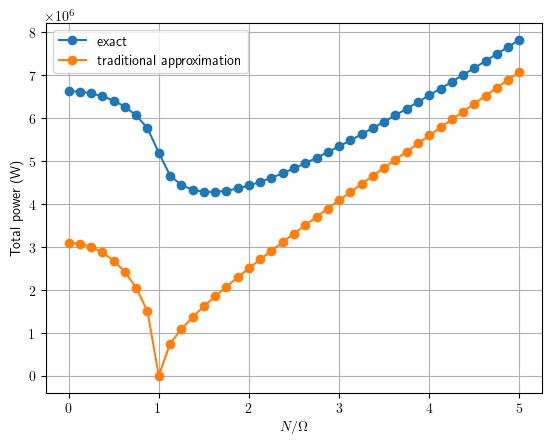

In [13]:
plt.rc('text', usetex=True)
plt.plot(N_values,results, marker='o', linestyle='-', label="exact")
plt.plot(N_values,results_trad, marker='o', linestyle='-', label="traditional approximation")
plt.xlabel(r'$N/\Omega$')
plt.ylabel(r'Total power (W)')
plt.legend()
plt.grid(True)
plt.show()